File: <code>ppg_abp_datasets_peak_50_with_filter.npz</code>

The datasets will be applied 'sav

In [1]:
# Required libraries
import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Check time
from tqdm import tqdm
from time import sleep

# Datasets
import vitaldb
import preprocess as pre
import pyvital

# PyTorch
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
from torch.optim import Adam
import torch.utils.data
from torch.utils.data import DataLoader
import torchvision.datasets
import torchvision.transforms as transforms
import torchvision.utils as vutils

In [2]:
PPG = 'SNUADC/PLETH'
ABP = 'SNUADC/ART'
SRATE = 100
MAX_CASE = 50
SEC = 25 

case_sample = 0
valid_mask = []
ppg_sets = []
abp_sets = []

for cid in tqdm(range(1, MAX_CASE+1)):
    vals = vitaldb.load_case(caseid=cid, tnames=[PPG, ABP], interval=1/SRATE)
    for i in range(0, len(vals), SEC*SRATE):
        segx = vals[i:i+ SEC*SRATE]
        ppg, abp = segx[:,0], segx[:,1]
        
        if len(segx) < SEC*SRATE: # 20초 이하의 데이터는 사용 x
            continue
        ###########################################
        # Check the validity of the segemnt
        # Valid condition
        # (1) 0 <= PPG <= 100
        # (2) 20 <= ABP <= 200
        # (3) mstd_val(abp) > 0
        # Else, remove
        ###########################################
        
                
        valid = True
        mstd_val, _ = pre.process_beat(abp)
        
        if np.isnan(ppg).any() or np.isnan(abp).any(): # delete non-value
            valid = False
        if (ppg < 0).any() or (ppg > 100).any():
            valid = False
        if (abp < 20).any() or (abp > 250).any():
            valid = False
        if np.array(mstd_val) <= 0:
            valid = False
#         if (np.abs(np.diff(ppg)) > 15).any():
#             valid = False
#         if (np.abs(np.diff(abp)) > 15).any():
#             valid = False        
            
        if valid:
            # Check ppg peak point
            ppg = pyvital.arr.exclude_undefined(ppg)
            ppg_peaks = pyvital.arr.detect_peaks(ppg, 100) 
            
            # Check abp peak point
            abp = pyvital.arr.exclude_undefined(abp)
            abp_peaks = pyvital.arr.detect_peaks(abp, 100)
                        
            # Mapping the first peak of PPG and the second peak of ABP
            try:
                pid, aid = ppg_peaks[0][0], abp_peaks[0][1]
                new_ppg = ppg[pid:pid+2000]
                new_abp = abp[aid:aid+2000]
                
                if len(new_ppg) != 2000 or len(new_abp) != 2000:
                    continue
                    
                ppg_sets.append(new_ppg)
                abp_sets.append(new_abp)                
                case_sample += 1
            except:
                continue   

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]

HR estimation failed, assume 75


  2%|█▋                                                                                 | 1/50 [00:09<07:32,  9.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  4%|███▎                                                                               | 2/50 [00:12<04:21,  5.44s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

  6%|████▉                                                                              | 3/50 [00:14<03:20,  4.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


  8%|██████▋                                                                            | 4/50 [00:29<06:26,  8.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 10%|████████▎                                                                          | 5/50 [00:33<04:59,  6.65s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 12%|█████████▉                                                                         | 6/50 [00:34<03:27,  4.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 14%|███████████▌                                                                       | 7/50 [00:45<04:51,  6.77s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 16%|█████████████▎                                                                     | 8/50 [00:46<03:28,  4.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 18%|██████████████▉                                                                    | 9/50 [00:47<02:31,  3.69s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 20%|████████████████▍                                                                 | 10/50 [01:00<04:28,  6.72s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 22%|██████████████████                                                                | 11/50 [01:01<03:13,  4.96s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 24%|███████████████████▋                                                              | 12/50 [01:10<03:56,  6.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 26%|█████████████████████▎                                                            | 13/50 [01:17<04:00,  6.50s/it]

HR estimation failed, assume 75


 28%|██████████████████████▉                                                           | 14/50 [01:20<03:11,  5.31s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 30%|████████████████████████▌                                                         | 15/50 [01:21<02:17,  3.93s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 32%|██████████████████████████▏                                                       | 16/50 [01:30<03:04,  5.43s/it]

HR estimation failed, assume 75


 34%|███████████████████████████▉                                                      | 17/50 [01:41<03:55,  7.13s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 36%|█████████████████████████████▌                                                    | 18/50 [01:42<02:48,  5.26s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 38%|███████████████████████████████▏                                                  | 19/50 [02:00<04:46,  9.24s/it]

HR estimation failed, assume 75


 40%|████████████████████████████████▊                                                 | 20/50 [02:19<06:08, 12.27s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 42%|██████████████████████████████████▍                                               | 21/50 [02:22<04:28,  9.25s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 44%|████████████████████████████████████                                              | 22/50 [02:31<04:19,  9.28s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 46%|█████████████████████████████████████▋                                            | 23/50 [02:32<03:00,  6.68s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 48%|███████████████████████████████████████▎                                          | 24/50 [02:37<02:40,  6.16s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 50%|█████████████████████████████████████████                                         | 25/50 [02:46<03:02,  7.30s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 52%|██████████████████████████████████████████▋                                       | 26/50 [02:54<02:57,  7.39s/it]

HR estimation failed, assume 75


 54%|████████████████████████████████████████████▎                                     | 27/50 [03:07<03:25,  8.95s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 56%|█████████████████████████████████████████████▉                                    | 28/50 [03:25<04:19, 11.80s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 58%|███████████████████████████████████████████████▌                                  | 29/50 [03:39<04:22, 12.49s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 60%|█████████████████████████████████████████████████▏                                | 30/50 [03:41<03:06,  9.34s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 62%|██████████████████████████████████████████████████▊                               | 31/50 [03:48<02:44,  8.68s/it]

HR estimation failed, assume 75


 64%|████████████████████████████████████████████████████▍                             | 32/50 [03:53<02:13,  7.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 66%|██████████████████████████████████████████████████████                            | 33/50 [03:54<01:33,  5.52s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 68%|███████████████████████████████████████████████████████▊                          | 34/50 [04:09<02:14,  8.39s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 70%|█████████████████████████████████████████████████████████▍                        | 35/50 [04:10<01:33,  6.24s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 72%|███████████████████████████████████████████████████████████                       | 36/50 [04:11<01:05,  4.67s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 74%|████████████████████████████████████████████████████████████▋                     | 37/50 [04:13<00:50,  3.90s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 76%|██████████████████████████████████████████████████████████████▎                   | 38/50 [04:22<01:02,  5.23s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 78%|███████████████████████████████████████████████████████████████▉                  | 39/50 [04:22<00:42,  3.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 80%|█████████████████████████████████████████████████████████████████▌                | 40/50 [04:24<00:31,  3.12s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 82%|███████████████████████████████████████████████████████████████████▏              | 41/50 [04:26<00:25,  2.83s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 84%|████████████████████████████████████████████████████████████████████▉             | 42/50 [04:28<00:22,  2.76s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 86%|██████████████████████████████████████████████████████████████████████▌           | 43/50 [04:38<00:34,  4.87s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 88%|████████████████████████████████████████████████████████████████████████▏         | 44/50 [04:48<00:38,  6.40s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 90%|█████████████████████████████████████████████████████████████████████████▊        | 45/50 [04:49<00:24,  4.85s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 92%|███████████████████████████████████████████████████████████████████████████▍      | 46/50 [04:57<00:22,  5.66s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 94%|█████████████████████████████████████████████████████████████████████████████     | 47/50 [04:58<00:13,  4.35s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estim

 96%|██████████████████████████████████████████████████████████████████████████████▋   | 48/50 [05:01<00:07,  3.73s/it]

HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75
HR estimation failed, assume 75


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 49/50 [05:11<00:05,  5.59s/it]

HR estimation failed, assume 75


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [05:22<00:00,  6.45s/it]


In [3]:
print(case_sample)
print(len(ppg_sets), np.amax(ppg_sets), np.amin(ppg_sets))
print(len(abp_sets), np.amax(abp_sets), np.amin(abp_sets))

12738
12738 96.8018 0.0309719
12738 245.954 20.814


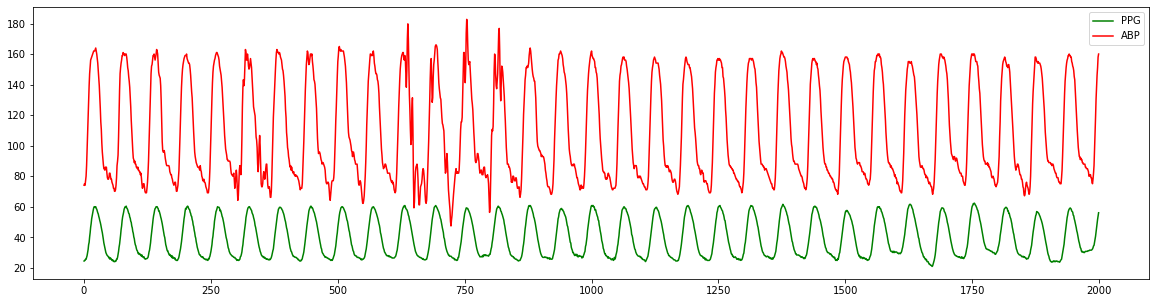

In [4]:
#### Before Preprocessing ------------------------------------
# Draw a sample waveform for PPG
plt.figure(figsize=(20,5))
plt.plot(ppg_sets[2], color='g', label='PPG')
plt.plot(abp_sets[2], color='r', label='ABP')
plt.legend()

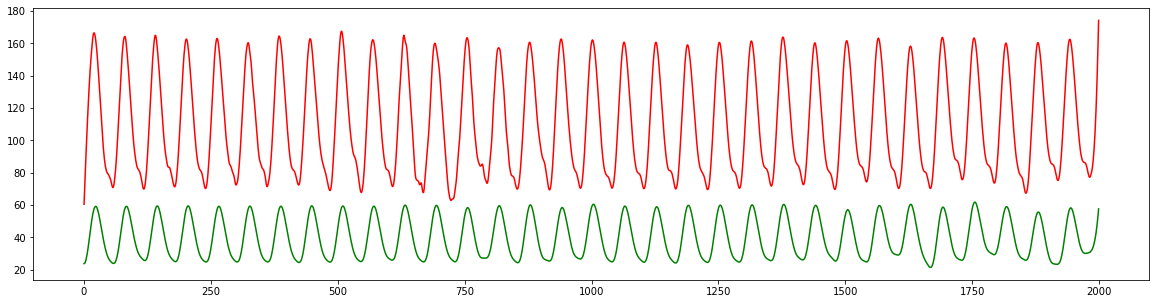

In [5]:
#### After Preprocessing ------------------------------------
from scipy.signal import savgol_filter
ppg_sets = savgol_filter(ppg_sets, 31, 3)
abp_sets = savgol_filter(abp_sets, 31, 3)
plt.figure(figsize=(20,5))
plt.plot(ppg_sets[2], color='g', label='PPG')
plt.plot(abp_sets[2], color='r', label='ABP')

In [6]:
cachefile ='./datasets/ppg_abp_datasets_peak_50_with_filter_both.npz'
np.savez(cachefile, ppg_sets=ppg_sets, abp_sets=abp_sets) # Save cahce file